Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[38  4]
 [ 1 71]]


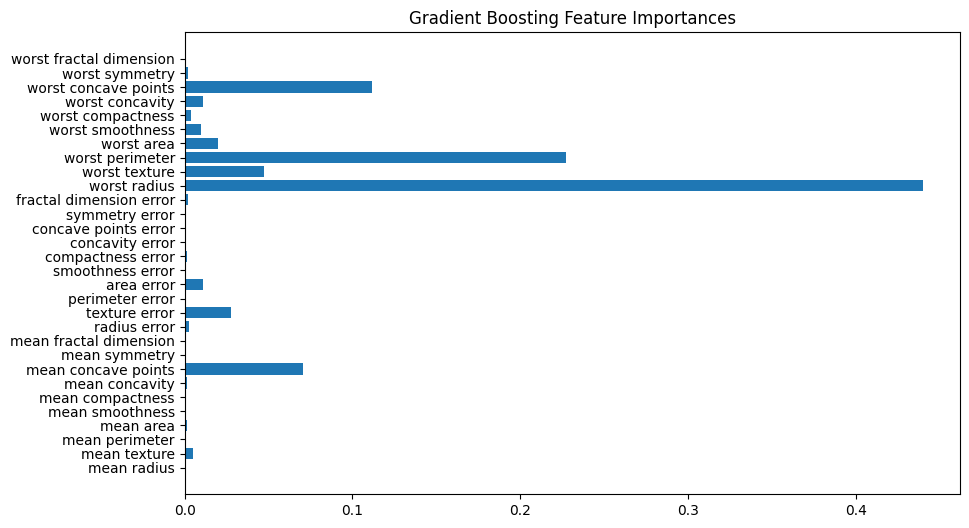

In [ ]:
# =============================
# GRADIENT BOOSTING CLASSIFICATION
# =============================
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("gb", GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

# Train
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importances
gb_model = pipeline.named_steps["gb"]
importances = gb_model.feature_importances_

# Plot
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, importances)
plt.title("Gradient Boosting Feature Importances")
plt.show()


In [ ]:
pip install xgboost


MSE: 0.20556612279993774
RMSE: 0.4533940039302877
R² Score: 0.8431282704763738


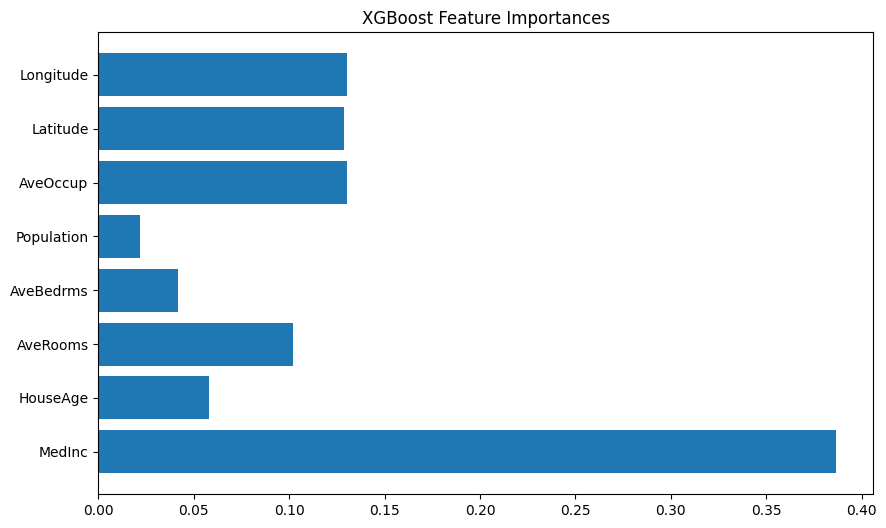

In [ ]:
# =============================
# XGBOOST REGRESSION
# =============================
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective="reg:squarederror"
    ))
])

# Train
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))
# print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
# print("R² Score:", r2_score(y_test, y_pred))

# Feature Importances
xgb_model = pipeline.named_steps["xgb"]
importances = xgb_model.feature_importances_

# Plot
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, importances)
plt.title("XGBoost Feature Importances")
plt.show()
